In [1]:
#https://www.kaggle.com/theblackmamba31/photo-to-sketch-using-autoencoder/notebook
import numpy as np
import tensorflow as tf
import keras 
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Input
#from keras_preprocessing.image import img_to_array
from tensorflow.keras.utils import img_to_array
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm 
import os
import re 

In [2]:
#files uploaded from drive
#https://drive.google.com/drive/folders/1BGstwm14hk4M1BdojqVnsyz8u5iBqU2U?usp=share_link
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
def sorted_alphanumeric(data):  
    convert = lambda text: int(text) if text.isdigit() else text.lower()
    alphanum_key = lambda key: [convert(c) for c in re.split('([0-9]+)',key)]
    return sorted(data,key = alphanum_key)


# defining the size of image 
SIZE = 256

image_path = "/content/drive/MyDrive/CUHK_data/CUHK_training_cropped_photos"
img_array = []

sketch_path = '/content/drive/MyDrive/CUHK_data/CUHK_training_cropped_sketches'
sketch_array = []

image_test_path = "/content/drive/MyDrive/CUHK_data/CUHK_testing_cropped_photos"
image_test_array = []

sketch_test_path = "/content/drive/MyDrive/CUHK_data/CUHK_testing_cropped_sketches"
sketch_test_array = []

#Here we convert the images to arrays and store them in list
image_file = sorted_alphanumeric(os.listdir(image_path))
sketch_file = sorted_alphanumeric(os.listdir(sketch_path))
image_test_file = sorted_alphanumeric(os.listdir(image_test_path))
sketch_test_file = sorted_alphanumeric(os.listdir(sketch_test_path))


In [4]:
#Data augumentation is carried out due to the small amount of samples in the dataset
for i in tqdm(image_file):
    image = cv2.imread(image_path + '/' + i,1)
    
    # as opencv load image in bgr format converting it to rgb
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # resizing images 
    image = cv2.resize(image, (SIZE, SIZE))
    
    # normalizing image 
    image = image.astype('float32') / 255.0
    
    #appending normal normal image    
    img_array.append(img_to_array(image))
    # Image Augmentation
    
    # horizontal flip 
    img1 = cv2.flip(image,1)
    img_array.append(img_to_array(img1))
     #vertical flip 
    img2 = cv2.flip(image,-1)
    img_array.append(img_to_array(img2))
     #vertical flip 
    img3 = cv2.flip(image,-1)
    # horizontal flip
    img3 = cv2.flip(img3,1)
    img_array.append(img_to_array(img3))
    # rotate clockwise 
    img4 = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)
    img_array.append(img_to_array(img4))
    # flip rotated image 
    img5 = cv2.flip(img4,1)
    img_array.append(img_to_array(img5))
     # rotate anti clockwise 
    img6 = cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE)
    img_array.append(img_to_array(img6))
    # flip rotated image 
    img7 = cv2.flip(img6,1)
    img_array.append(img_to_array(img7))
    
for i in tqdm(sketch_file):
    image = cv2.imread(sketch_path + '/' + i,1)
      
    # as opencv load image in bgr format converting it to rgb
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
      
    # resizing images 
    image = cv2.resize(image, (SIZE, SIZE))
      
    # normalizing image 
    image = image.astype('float32') / 255.0
    # appending normal sketch image
    sketch_array.append(img_to_array(image))
      
    #Image Augmentation
    # horizontal flip 
    img1 = cv2.flip(image,1)
    sketch_array.append(img_to_array(img1))
    #vertical flip 
    img2 = cv2.flip(image,-1)
    sketch_array.append(img_to_array(img2))
    #vertical flip 
    img3 = cv2.flip(image,-1)
    # horizontal flip
    img3 = cv2.flip(img3,1)
    sketch_array.append(img_to_array(img3))
    # rotate clockwise 
    img4 = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)
    sketch_array.append(img_to_array(img4))
    # flip rotated image 
    img5 = cv2.flip(img4,1)
    sketch_array.append(img_to_array(img5))
    # rotate anti clockwise 
    img6 = cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE)
    sketch_array.append(img_to_array(img6))
    # flip rotated image 
    img7 = cv2.flip(img6,1)
    sketch_array.append(img_to_array(img7))
      

100%|██████████| 88/88 [01:07<00:00,  1.31it/s]


In [5]:
for i in tqdm(image_test_file):
    image = cv2.imread(image_test_path + '/' + i,1)
    
    # as opencv load image in bgr format converting it to rgb
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # resizing images 
    image = cv2.resize(image, (SIZE, SIZE))
    
    # normalizing image 
    image = image.astype('float32') / 255.0
    
    #appending normal normal image    
    image_test_array.append(img_to_array(image))

for i in tqdm(sketch_test_file):
    image = cv2.imread(sketch_test_path + '/' + i,1)
      
    # as opencv load image in bgr format converting it to rgb
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
      
    # resizing images 
    image = cv2.resize(image, (SIZE, SIZE))
      
    # normalizing image 
    image = image.astype('float32') / 255.0
    # appending normal sketch image
    sketch_test_array.append(img_to_array(image))

100%|██████████| 100/100 [01:13<00:00,  1.37it/s]


In [6]:
print("Total number of sketch images:",len(sketch_array))
print("Total number of images:",len(img_array))
print(len(img_array[1]))

Total number of sketch images: 704
Total number of images: 704
256


In [7]:
#Slicing and reshaping

#There are 704 train images and 100 test images 
#After slicing the image array, we reshaped them so that images can be fed directly into the encoder network

train_sketch_image = sketch_array[0:]
train_image = img_array[0:]
test_sketch_image = sketch_test_array[0:]
test_image = image_test_array[0:]
# reshaping
train_sketch_image = np.reshape(train_sketch_image,(len(train_sketch_image),SIZE*SIZE*3))
train_image = np.reshape(train_image, (len(train_image),SIZE*SIZE*3))
print('Train color image shape:',train_image.shape)
test_sketch_image = np.reshape(test_sketch_image,(len(test_sketch_image),SIZE*SIZE*3))
test_image = np.reshape(test_image, (len(test_image),SIZE*SIZE*3))
print('Test color image shape',test_image.shape)

Train color image shape: (704, 196608)
Test color image shape (100, 196608)


In [ ]:
#Load the model if you dont want to run the process again
#from tensorflow.keras.models import load_model
#model = load_model('/content/drive/MyDrive/CUHK_data/Finalsketch2faceDAE.h5')

In [8]:
#Model
import keras
import matplotlib.pyplot as plt

# define a 3+3 deep autoencoder
input_img = keras.Input(shape=(SIZE*SIZE*3,))
encoded = keras.layers.Dense(128, activation='relu')(input_img)
encoded = keras.layers.Dense(64, activation='relu')(encoded)
encoded = keras.layers.Dense(32, activation='relu')(encoded)
#encoded = keras.layers.Dense(32, activation='relu')(encoded)
#encoded = keras.layers.Dense(16, activation='relu')(encoded)

decoded = keras.layers.Dense(64, activation='relu')(encoded)
decoded = keras.layers.Dense(128, activation='relu')(decoded)
decoded = keras.layers.Dense(SIZE*SIZE*3, activation='sigmoid')(decoded)
#decoded = keras.layers.Dense(64, activation='relu')(decoded)
#decoded = keras.layers.Dense(128, activation='relu')(decoded)

model_DAE = keras.Model(input_img, decoded)

#decoder model
model_DAE_encoder = keras.Model(input_img, encoded)

decoder_input = keras.Input(shape=(encoded.shape[1],))
# Retrieve the last layer of the autoencoder model
decoder_layer = model_DAE.layers[-3](decoder_input)
decoder_layer = model_DAE.layers[-2](decoder_layer)
decoder_layer = model_DAE.layers[-1](decoder_layer)

# Create the decoder model
model_DAE_decoder = keras.Model(decoder_input, decoder_layer)


    

In [ ]:
#summary of model
#model = model_DAE()
#model.summary()

Epoch 1/150
22/22 [==============================] - 8s 62ms/step - loss: 0.6305 - val_loss: 0.6239
Epoch 2/150
22/22 [==============================] - 1s 45ms/step - loss: 0.6068 - val_loss: 0.6158
Epoch 3/150
22/22 [==============================] - 1s 43ms/step - loss: 0.5915 - val_loss: 0.5952
Epoch 4/150
22/22 [==============================] - 1s 43ms/step - loss: 0.5711 - val_loss: 0.5821
Epoch 5/150
22/22 [==============================] - 1s 43ms/step - loss: 0.5653 - val_loss: 0.5861
Epoch 6/150
22/22 [==============================] - 1s 43ms/step - loss: 0.5636 - val_loss: 0.5775
Epoch 7/150
22/22 [==============================] - 1s 44ms/step - loss: 0.5607 - val_loss: 0.5754
Epoch 8/150
22/22 [==============================] - 1s 44ms/step - loss: 0.5561 - val_loss: 0.5703
Epoch 9/150
22/22 [==============================] - 1s 46ms/step - loss: 0.5550 - val_loss: 0.5718
Epoch 10/150
22/22 [==============================] - 1s 50ms/step - loss: 0.5513 - val_loss: 0.5698

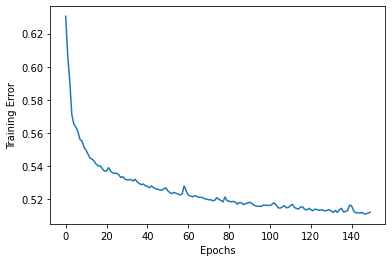

In [11]:
#Model training and results
#sketch2face
#Compiling and Fitting the model
#Adam optimizer is used and binary cross-entropy as loss function and model is trained for 100 epochs

model_DAE.compile(optimizer = 'adam', loss = 'binary_crossentropy')

hist2 = model_DAE.fit(train_sketch_image, train_image, epochs = 100, verbose = 1,
                      validation_data = (test_sketch_image,test_image))

#changing the hyperparameter epochs = 150
#hist2 = model_DAE.fit(train_sketch_image, train_image, epochs = 150, verbose = 1,
                      #validation_data = (test_sketch_image,test_image))

plt.plot(hist2.history["loss"]);
plt.xlabel('Epochs');
plt.ylabel('Training Error');

4/4 [==============================] - 0s 10ms/step


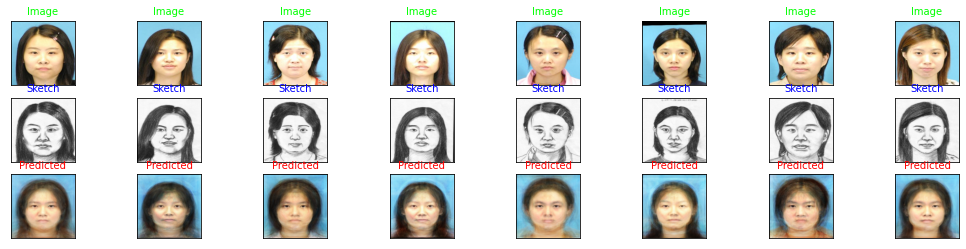

In [ ]:
#sketch2face
#encode and decode
decoded_imgs = model_DAE.predict(test_image)
n = 9
plt.figure(figsize=(20,4))

for j in range(2,n+1):
  pl_ax = plt.subplot(3,n,j)
  plt.title("Image",fontsize=10,color='Lime')
  plt.imshow(test_image[j].reshape(256,256,3))
  plt.gray()
  pl_ax.get_xaxis().set_visible(False)
  pl_ax.get_yaxis().set_visible(False)
  pl_ax = plt.subplot(3,n,j+n)
  plt.title("Sketch",fontsize=10,color='Blue')
  plt.imshow(test_sketch_image[j].reshape(256,256,3))
  plt.gray()
  pl_ax.get_xaxis().set_visible(False)
  pl_ax.get_yaxis().set_visible(False)

  #reconstruct
  pl_ax = plt.subplot(3,n,j+(2*n))
  plt.title("Predicted",fontsize=10,color='red')
  plt.imshow((decoded_imgs[j].reshape(256,256,3)))
  plt.gray()
  pl_ax.get_xaxis().set_visible(False)
  pl_ax.get_yaxis().set_visible(False)
plt.show()


In [ ]:
'''
from skimage.metrics import structural_similarity as ssim1
SSIMarray = []
sumssim = 0
for i in range(0, 99):
  SSIM = ssim1(test_image[i], pred[i], multichannel=True)
  SSIMarray.append(SSIM)
  sumssim+= SSIM

avgssim = sumssim/100
print("SSIM =",round(avgssim,4))

from sklearn.metrics import mean_squared_error as mse1
import math
RMSEarray = []
sumrmse = 0

t = np.reshape(test_image, (100,-1))
p = np.reshape(pred, (99,-1))

for i in range(0, 99):
  MSE = mse1(t[i], p[i])
  RMSEarray.append(math.sqrt(MSE))
  sumrmse+= math.sqrt(MSE)

avgrmse = sumrmse/100
print("RMSE =",round(avgrmse,4))

from sklearn.metrics import median_absolute_error as mae

maearray = []
summae = 0

for i in range(0, 99):
  MAE = mae(t[i], p[i])
  maearray.append(MAE)
  summae+= MAE

avgrmae = summae/100
print("MAE =",round(avgrmae,4))
'''

<ipython-input-20-67c98a5348a1>:5: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  SSIM = ssim1(test_image[i], pred[i], multichannel=True)


SSIM = 0.7738
RMSE = 0.1565
MAE = 0.0834


In [ ]:
#save the model

#sketch2face
model_DAE.save("/content/drive/MyDrive/CUHK_data/Finalsketch2faceDAE.h5")